In [47]:
import pandas as pd

parquet_path = "output/final_wikipedia_vietnam_full.parquet"
df_parquet = pd.read_parquet(parquet_path)
print(df_parquet.info())
print(df_parquet.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38068 entries, 0 to 38067
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       38068 non-null  object
 1   url         38068 non-null  object
 2   text        38068 non-null  object
 3   summary     38068 non-null  object
 4   categories  38068 non-null  object
 5   crawled_at  38068 non-null  object
 6   length      38068 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 2.0+ MB
None
                                   title  \
0              Anh hùng dân tộc Việt Nam   
1                         An Dương Vương   
2                      Nhà nước Việt Nam   
3                             Chúa Trịnh   
4  Cải cách điền địa (Việt Nam Cộng hòa)   

                                                 url  \
0  https://vi.wikipedia.org/wiki/Anh_h%C3%B9ng_d%...   
1  https://vi.wikipedia.org/wiki/An_D%C6%B0%C6%A1...   
2  https://vi.wikipedia.org/wiki/Nh%C3%A0_n%

In [48]:
df_parquet[:5]

,title,url,text,summary,categories,crawled_at,length
0,Anh hùng dân tộc Việt Nam,https://vi.wikipedia.org/wiki/Anh_h%C3%B9ng_d%...,Anh hùng dân tộc Việt Nam là thuật ngữ chỉ nhữ...,Anh hùng dân tộc Việt Nam là thuật ngữ chỉ nhữ...,[Nhân_vật_lịch_sử_Việt_Nam],2025-11-25T08:51:20.608476,3985
1,An Dương Vương,https://vi.wikipedia.org/wiki/An_D%C6%B0%C6%A1...,"An Dương Vương (chữ Hán: 安陽王), tên thật là Thụ...","An Dương Vương (chữ Hán: 安陽王), tên thật là Thụ...",[Triều_đại_Việt_Nam],2025-11-25T08:51:20.691663,11805
2,Nhà nước Việt Nam,https://vi.wikipedia.org/wiki/Nh%C3%A0_n%C6%B0...,Nhà nước Cộng hòa xã hội chủ nghĩa Việt Nam là...,Nhà nước Cộng hòa xã hội chủ nghĩa Việt Nam là...,[Nhà_nước_Việt_Nam],2025-11-25T08:51:20.778537,12275
3,Chúa Trịnh,https://vi.wikipedia.org/wiki/Ch%C3%BAa_Tr%E1%...,"Chúa Trịnh (chữ Nôm: 主鄭, chữ Hán: 鄭王 / Trịnh v...","Chúa Trịnh (chữ Nôm: 主鄭, chữ Hán: 鄭王 / Trịnh v...",[Chúa_Trịnh],2025-11-25T08:51:20.930408,21909
4,Cải cách điền địa (Việt Nam Cộng hòa),https://vi.wikipedia.org/wiki/C%E1%BA%A3i_c%C3...,Cải cách điền địa là tên gọi chung cho 2 đợt p...,Cải cách điền địa là tên gọi chung cho 2 đợt p...,[Sự_kiện_lịch_sử_Việt_Nam],2025-11-25T08:51:21.073649,26658


In [49]:
df_parquet['text'].iloc[0]

'Anh hùng dân tộc Việt Nam là thuật ngữ chỉ những người có công kiệt xuất trong cuộc đấu tranh cho sự trường tồn và phát triển của dân tộc Việt Nam, được nhân dân suy tôn làm anh hùng và ghi danh vào lịch sử dân tộc Việt Nam.\n\nĐặc điểm\nAnh hào dân tộc thường xuất hiện ở bước ngoặt lịch sử của dân tộc, trở thành biểu tượng và niềm tự hào bất diệt của dân tộc. Như vậy, Anh hùng dân tộc là danh hiệu cao quý hơn Anh hùng (là người tài năng xuất chúng, công to, đức cả khiến mọi người đều kính phục) và các danh hiệu Anh hùng Lực lượng vũ trang nhân dân và Anh hùng lao động ở Việt Nam.\nTrong suốt lịch sử hàng nghìn năm bảo vệ và phát triển đất nước của dân tộc Việt Nam đã xuất hiện nhiều anh hùng tiêu biểu. Năm 2013, lần đầu tiên, Bộ Văn hóa, Thể thao và Du lịch đã đưa ra danh sách 14 vị anh hùng tiêu biểu nhất trong lịch sử Việt Nam để tôn vinh Anh hùng dân tộc theo thứ tự thời gian như sau:\n\nHùng Vương: Quốc tổ của người dân Việt Nam khởi sinh ra thời Hồng Bàng với 18 đời vua trị vì.\

In [50]:
df_parquet.shape

(38068, 7)

In [ ]:
# có tổng 38068 bài viết

In [42]:
path1 = "output/final_wikipedia_vietnam_chunks.parquet"
df1 = pd.read_parquet(path=path1)

In [43]:
df1.shape

(231251, 7)

=== THỐNG KÊ ĐỘ DÀI CHUNK ===
count    237476.000000
mean        612.529152
std         197.478981
min          85.000000
25%         473.000000
50%         684.000000
75%         775.000000
max         917.000000
Name: vector_text, dtype: float64


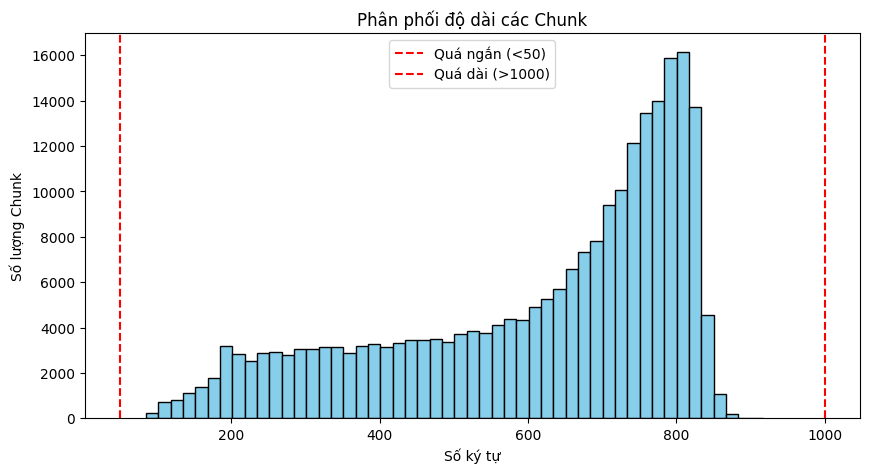


--- Top 5 Chunk ngắn nhất (Cần kiểm tra xem có phải rác không) ---
['Chủ đề: Lê Bôi\nNội dung: Cái chết. Hiện chưa rõ nguyên nhân ông mất và mất vào năm nào.'
 'Chủ đề: Lý Quốc Sư\nNội dung: Ở vùng châu thổ sông Hồng, tỉnh thành nào cũng có nhiều nơi thờ ông.'
 'Chủ đề: Tô Lâm\nNội dung: Ông cũng đã gặp Phó Tổng thống thứ nhất Iran – Mohammad Mokhber.'
 'Chủ đề: Lý Huệ Tông\nNội dung: Vằng vặc hai lần đuốc soi sáng; mặt trời gác núi là hết bóng).'
 'Chủ đề: Đặng Thị Huệ\nNội dung: Trăm quan có mắt như mờ,. Để cho Huy quận vào sờ chính cung.']

--- Top 5 Chunk dài nhất (Cần kiểm tra xem có bị cắt cụt không) ---
[]


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file
df = pd.read_parquet("output/wiki_vn_chunks.parquet")

# 1. Thống kê cơ bản
print("=== THỐNG KÊ ĐỘ DÀI CHUNK ===")
lengths = df['vector_text'].str.len()
print(lengths.describe())

# 2. Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 5))
plt.hist(lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Phân phối độ dài các Chunk')
plt.xlabel('Số ký tự')
plt.ylabel('Số lượng Chunk')
plt.axvline(x=50, color='r', linestyle='--', label='Quá ngắn (<50)')
plt.axvline(x=1000, color='r', linestyle='--', label='Quá dài (>1000)')
plt.legend()
plt.show()

# 3. Soi các chunk "dị biệt"
print("\n--- Top 5 Chunk ngắn nhất (Cần kiểm tra xem có phải rác không) ---")
print(df[lengths < 100]['vector_text'].head(5).values)

print("\n--- Top 5 Chunk dài nhất (Cần kiểm tra xem có bị cắt cụt không) ---")
print(df[lengths > 1500]['vector_text'].head(5).values)

In [13]:
def check_syntax_quality(text):
    # Loại bỏ phần "Chủ đề: ... Nội dung: " để check nội dung chính
    try:
        content = text.split("Nội dung:")[1].strip()
    except:
        return "Lỗi format"

    issues = []
    
    # Lỗi 1: Bắt đầu bằng chữ thường (Dấu hiệu bị cắt giữa câu)
    # Lưu ý: Tiếng Việt có thể bắt đầu bằng số hoặc quote, cần regex kỹ
    import re
    if re.match(r'^[a-zà-ỹ]', content): 
        issues.append("Bắt đầu bằng chữ thường")
        
    # Lỗi 2: Không kết thúc bằng dấu câu (Bị cắt cụt)
    if content[-1] not in ['.', '!', '?', '"', "'"]:
        issues.append("Không có dấu kết câu")
        
    return ", ".join(issues) if issues else "OK"

# Kiểm tra trên mẫu ngẫu nhiên 1000 chunk
sample_df = df.sample(1000)
sample_df['quality_check'] = sample_df['vector_text'].apply(check_syntax_quality)

print("=== TỶ LỆ LỖI CÚ PHÁP ===")
print(sample_df['quality_check'].value_counts())

# Xem các chunk bị lỗi để fix
print("\n--- Ví dụ chunk bị lỗi 'Bắt đầu bằng chữ thường' ---")
errors = sample_df[sample_df['quality_check'].str.contains("Bắt đầu bằng chữ thường")]
if not errors.empty:
    print(errors.iloc[0]['vector_text'])

=== TỶ LỆ LỖI CÚ PHÁP ===
quality_check
OK                                               882
Bắt đầu bằng chữ thường                           84
Không có dấu kết câu                              32
Bắt đầu bằng chữ thường, Không có dấu kết câu      2
Name: count, dtype: int64

--- Ví dụ chunk bị lỗi 'Bắt đầu bằng chữ thường' ---
Chủ đề: Binh chủng Công binh, Quân đội nhân dân Việt Nam
Nội dung: Đơn vị trực thuộc. Trường Đại học Ngô Quyền. Viện Kỹ thuật Công binh. Ban Quản lý dự án các công trình DKI (Nhà giàn trên biển). Ban Quản lý dự án 756. Trung tâm Tư vấn khảo sát thiết kế công trình Quốc phòng (Giám đốc: Đại tá Nguyễn Thanh Quang). Trung tâm Công nghệ Xử lý Bom mìn (BOMICEN). Thành lập tháng 9 năm 1996. Đơn vị Anh hùng lực lượng vũ trang nhân dân (2005). Trường Trung cấp kỹ thuật Công binh. Lữ đoàn Công binh Công trình 229. Lữ đoàn Công binh Vượt sông 239. Lữ đoàn Công binh Vượt sông 249. Lữ đoàn Công binh Công trình 279. Lữ đoàn Công binh Công trình 72. Lữ đoàn Công binh Công t

In [7]:
import pandas as pd
df2 = pd.read_parquet(path="output/wiki_vn_chunks.parquet")

In [19]:
df2['vector_text'][:20].tolist()

['Chủ đề: Anh hùng dân tộc Việt Nam\nNội dung: Anh hùng dân tộc Việt Nam là thuật ngữ chỉ những người có công kiệt xuất trong cuộc đấu tranh cho sự trường tồn và phát triển của dân tộc Việt Nam, được nhân dân suy tôn làm anh hùng và ghi danh vào lịch sử dân tộc Việt Nam.',
 'Chủ đề: Anh hùng dân tộc Việt Nam\nNội dung: Hùng Vương: Quốc tổ của người dân Việt Nam khởi sinh ra thời Hồng Bàng với 18 đời vua trị vì. Hai Bà Trưng, tức Trưng Trắc và Trưng Nhị: 2 nữ thủ lĩnh của cuộc khởi nghĩa chống lại thời kỳ bắc thuộc lần thứ nhất của Nhà Hán. Lý Nam Đế, tức Lý Bí: thủ lĩnh của cuộc khởi nghĩa chống lại thời kỳ bắc thuộc lần thứ hai của Nhà Lương, lập ra Nhà Tiền Lý và nước Vạn Xuân. Ngô Quyền: vị vua đánh bại quân Nam Hán trên sông Bạch Đằng, giành độc lập dân tộc và lập ra Nhà Ngô. Đinh Tiên Hoàng, tức Đinh Bộ Lĩnh: người đánh bại 12 sứ quân và thống nhất Việt Nam, lập ra Nhà Đinh và nước Đại Cồ Việt. Lê Đại Hành tức Lê Hoàn: vị tướng đánh bại quân Tống, lập ra Nhà Tiền Lê. Lý Thái Tổ, t

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237476 entries, 0 to 237475
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   chunk_id      237476 non-null  object
 1   doc_title     237476 non-null  object
 2   doc_url       237476 non-null  object
 3   doc_category  237476 non-null  object
 4   vector_text   237476 non-null  object
 5   display_text  237476 non-null  object
 6   char_len      237476 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 12.7+ MB


In [ ]:
import time
import pandas as pd
import random
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from datetime import datetime
import re
import os

# --- CẤU HÌNH ---
OUTPUT_FILE = "output/scraped_tvpl.parquet"

# Link mẫu (Lưu ý: TVPL có thể yêu cầu đăng nhập với một số văn bản sâu)
TARGET_URLS = [
    # --- 1. NHÓM CỐT LÕI (Bắt buộc phải có) ---
    {"url": "https://thuvienphapluat.vn/van-ban/Bo-may-hanh-chinh/Hien-phap-2013-215627.aspx", "title": "Hiến pháp 2013"},
    {"url": "https://thuvienphapluat.vn/van-ban/Trach-nhiem-hinh-su/Bo-luat-hinh-su-2015-296661.aspx", "title": "Bộ luật Hình sự 2015"},
    {"url": "https://thuvienphapluat.vn/van-ban/Quyen-dan-su/Bo-luat-dan-su-2015-306461.aspx", "title": "Bộ luật Dân sự 2015"},
    
    # --- 2. KINH TẾ & ĐẤT ĐAI (Hot trend) ---
    {"url": "https://thuvienphapluat.vn/van-ban/Bat-dong-san/Luat-Dat-dai-2024-31-2024-QH15-523642.aspx", "title": "Luật Đất đai 2024 (Mới)"},
    {"url": "https://thuvienphapluat.vn/van-ban/Doanh-nghiep/Luat-Doanh-nghiep-2020-443638.aspx", "title": "Luật Doanh nghiệp 2020"},
    {"url": "https://thuvienphapluat.vn/van-ban/Thuong-mai/Luat-Thuong-mai-2005-26426.aspx", "title": "Luật Thương mại 2005"},

    # --- 3. XÃ HỘI & GIÁO DỤC (Câu hỏi đời sống) ---
    {"url": "https://thuvienphapluat.vn/van-ban/Lao-dong-Tien-luong/Bo-Luat-lao-dong-2019-396185.aspx", "title": "Bộ luật Lao động 2019"},
    {"url": "https://thuvienphapluat.vn/van-ban/Quyen-dan-su/Luat-hon-nhan-va-gia-dinh-2014-238640.aspx", "title": "Luật Hôn nhân và Gia đình 2014"},
    {"url": "https://thuvienphapluat.vn/van-ban/Giao-duc/Luat-Giao-duc-2019-393627.aspx", "title": "Luật Giáo dục 2019"},
    
    # --- 4. AN NINH & CHỦ QUYỀN (Câu hỏi Địa lý/Chính trị) ---
    {"url": "https://thuvienphapluat.vn/van-ban/Cong-nghe-thong-tin/Luat-an-ninh-mang-2018-351416.aspx", "title": "Luật An ninh mạng 2018"},
    {"url": "https://thuvienphapluat.vn/van-ban/Tai-nguyen-Moi-truong/Luat-bien-Viet-Nam-2012-142940.aspx", "title": "Luật Biển Việt Nam 2012"}, # Cực quan trọng cho câu hỏi chủ quyền biển đảo
    {"url": "https://thuvienphapluat.vn/van-ban/Bo-may-hanh-chinh/Luat-Nghia-vu-quan-su-2015-280628.aspx", "title": "Luật Nghĩa vụ quân sự 2015"},

    # --- 5. HÀNH CHÍNH & CÔNG DÂN ---
    {"url": "https://thuvienphapluat.vn/van-ban/Quyen-dan-su/Luat-Can-cuoc-2023-34-2023-QH15-524024.aspx", "title": "Luật Căn cước 2023 (Mới)"}, # Thay thế luật CCCD cũ
    {"url": "https://thuvienphapluat.vn/van-ban/Giao-thong-Van-tai/Luat-Giao-thong-duong-bo-2008-81766.aspx", "title": "Luật Giao thông đường bộ 2008"},
]

def setup_driver():
    options = Options()
    # options.add_argument("--headless") # Nên tắt headless khi debug để xem nó có bị dính CAPTCHA không
    options.add_argument("--disable-blink-features=AutomationControlled")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    options.add_argument("--window-size=1920,1080")
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")
    
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
    return driver

def clean_tvpl_html(soup):
    """
    [QUAN TRỌNG] Xóa rác đặc thù của TVPL trước khi lấy text
    """
    # Xóa quảng cáo, script, style, nút bấm
    for tag in soup(['script', 'style', 'noscript', 'iframe', 'button', 'input']):
        tag.decompose()
        
    # Xóa các div rác thường gặp trên TVPL
    garbage_classes = ['ads', 'quangcao', 'box-lien-quan', 'bottom-mobile', 'tool-bar']
    for cls in garbage_classes:
        for div in soup.find_all(class_=re.compile(cls)):
            div.decompose()
            
    # Xóa các link "Xem thêm", "Tải về"
    for a in soup.find_all('a'):
        if "Tải về" in a.get_text() or "Xem thêm" in a.get_text():
            a.decompose()
            
    return soup

def parse_law_content(html_content, doc_title):
    soup = BeautifulSoup(html_content, 'html.parser')
    
    # [FIX] Selector chuẩn của TVPL
    # Nội dung thường nằm trong div class='content1'
    content_div = soup.find('div', class_='content1')
    
    # Nếu không thấy, thử tìm div id='divContent' (cho một số trang cũ)
    if not content_div:
        content_div = soup.find('div', id='divContent')
        
    if not content_div:
        print(f"⚠️ Không tìm thấy div content cho: {doc_title}")
        return []

    # Làm sạch HTML
    content_div = clean_tvpl_html(content_div)

    # Lấy text
    text = content_div.get_text(separator='\n')
    
    # --- LOGIC CẮT ĐIỀU LUẬT (GIỮ NGUYÊN TỪ CODE TRƯỚC) ---
    lines = text.split('\n')
    chunks = []
    
    current_context = []
    current_header = ""
    current_body = []
    
    context_pattern = re.compile(r'^(CHƯƠNG|MỤC|PHẦN) [IVX0-9]+', re.IGNORECASE)
    article_pattern = re.compile(r'^\s*Điều \d+[\.\:\s]') # Thêm \s* đề phòng khoảng trắng đầu dòng

    for line in lines:
        line = line.strip()
        if not line: continue
        
        # Lọc rác lần cuối (Hard rule)
        if len(line) < 5 or "TVPL" in line: continue

        # 1. Context
        if context_pattern.match(line) or (line.isupper() and len(line) < 100 and "ĐIỀU" not in line):
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
                current_header = ""
                current_body = []
            
            if context_pattern.match(line):
                current_context = [line]

        # 2. Điều luật
        elif article_pattern.match(line):
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
            
            current_header = line
            current_body = []
        
        # 3. Body
        else:
            if current_header:
                current_body.append(line)

    # Chunk cuối
    if current_header:
        context_str = " - ".join(current_context)
        full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_header}\n" + "\n".join(current_body)
        chunks.append(full_text.strip())
        
    return chunks

def main():
    os.makedirs(os.path.dirname(OUTPUT_FILE), exist_ok=True)
    driver = setup_driver()
    all_data = []

    try:
        for target in TARGET_URLS:
            url = target['url']
            title = target['title']
            print(f"🕷️ Selenium Navigating: {title}")
            
            try:
                driver.get(url)
                
                # Cuộn trang từ từ để giả lập người dùng (tránh anti-bot)
                total_height = int(driver.execute_script("return document.body.scrollHeight"))
                for i in range(1, total_height, 700):
                    driver.execute_script(f"window.scrollTo(0, {i});")
                    time.sleep(0.2)
                
                time.sleep(2) # Chờ load xong hẳn
                
                html = driver.page_source
                chunks = parse_law_content(html, title)
                
                valid_chunks = 0
                for chunk_text in chunks:
                    if len(chunk_text) < 50: continue
                    all_data.append({
                        "title": title,
                        "url": url,
                        "text": chunk_text,
                        "categories": ["Pháp luật", "TVPL"],
                        "doc_type": "law_article"
                    })
                    valid_chunks += 1
                
                print(f"   ✅ OK: Lấy được {valid_chunks} điều luật.")
                
            except Exception as e:
                print(f"❌ Error scraping {url}: {e}")

    finally:
        driver.quit()

    if all_data:
        df = pd.DataFrame(all_data)
        df['crawled_at'] = datetime.now().isoformat()
        df.to_parquet(OUTPUT_FILE, index=False)
        print(f"💾 DONE! Saved {len(df)} records to {OUTPUT_FILE}")

if __name__ == "__main__":
    main()

🕷️ Selenium Navigating: Hiến pháp 2013


KeyboardInterrupt: 

In [13]:
import pandas as pd

dff = pd.read_parquet(path="output/scraped_tvpl.parquet")

dff

,title,url,text,categories,doc_type,crawled_at
0,Hiến pháp 2013,https://thuvienphapluat.vn/van-ban/Bo-may-hanh...,Văn bản: Hiến pháp 2013\nChương I.\nĐiều 1.\nN...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
1,Hiến pháp 2013,https://thuvienphapluat.vn/van-ban/Bo-may-hanh...,Văn bản: Hiến pháp 2013\nChương I.\nĐiều 2.\n1...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
2,Hiến pháp 2013,https://thuvienphapluat.vn/van-ban/Bo-may-hanh...,Văn bản: Hiến pháp 2013\nChương I.\nĐiều 3.\nN...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
3,Hiến pháp 2013,https://thuvienphapluat.vn/van-ban/Bo-may-hanh...,Văn bản: Hiến pháp 2013\nChương I.\nĐiều 4.\n1...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
4,Hiến pháp 2013,https://thuvienphapluat.vn/van-ban/Bo-may-hanh...,Văn bản: Hiến pháp 2013\nChương I.\nĐiều 5.\n1...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
...,...,...,...,...,...,...
1256,Luật Biển Việt Nam 2012,https://thuvienphapluat.vn/van-ban/Tai-nguyen-...,Văn bản: Luật Biển Việt Nam 2012\nChương VI\nĐ...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
1257,Luật Biển Việt Nam 2012,https://thuvienphapluat.vn/van-ban/Tai-nguyen-...,Văn bản: Luật Biển Việt Nam 2012\nChương VI\nĐ...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
1258,Luật Biển Việt Nam 2012,https://thuvienphapluat.vn/van-ban/Tai-nguyen-...,Văn bản: Luật Biển Việt Nam 2012\nChương VI\nĐ...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650
1259,Luật Biển Việt Nam 2012,https://thuvienphapluat.vn/van-ban/Tai-nguyen-...,Văn bản: Luật Biển Việt Nam 2012\nChương VI\nĐ...,"[Pháp luật, TVPL]",law_article,2025-12-09T12:49:59.508650


In [14]:
import pandas as pd

# Đọc file vừa crawl
df = pd.read_parquet("output/scraped_tvpl.parquet") # Hoặc file parquet tương ứng

# Đếm xem mỗi văn bản có bao nhiêu điều
print("📊 THỐNG KÊ DỮ LIỆU ĐÃ CRAWL:")
stats = df['title'].value_counts()
print(stats)

print(f"\n✅ Tổng số chunk: {len(df)}")

📊 THỐNG KÊ DỮ LIỆU ĐÃ CRAWL:
title
Bộ luật Hình sự 2015              500
Luật Đất đai 2024 (Mới)           395
Luật Hôn nhân và Gia đình 2014    162
Hiến pháp 2013                    113
Luật An ninh mạng 2018             46
Luật Biển Việt Nam 2012            41
Luật Giáo dục 2019                  4
Name: count, dtype: int64

✅ Tổng số chunk: 1261


In [17]:
dff["text"][1]

'Văn bản: Hiến pháp 2013\nChương I.\nĐiều 2.\n1. Nhà nước Cộng hòa xã hội\nchủ nghĩa Việt Nam là nhà nước pháp quyền xã hội chủ nghĩa của Nhân dân, do\nNhân dân, vì Nhân dân.\n2. Nước Cộng hòa xã hội\nchủ nghĩa Việt Nam do Nhân dân làm chủ; tất cả quyền lực nhà nước thuộc về Nhân\ndân mà nền tảng là liên minh giữa giai cấp công nhân với giai cấp nông dân và đội\nngũ trí thức.\n3. Quyền lực nhà nước là\nthống nhất, có sự phân công, phối hợp, kiểm soát giữa các cơ quan nhà nước\ntrong việc thực hiện các quyền lập pháp, hành pháp, tư pháp.'

In [18]:
import pandas as pd

# Đọc file parquet
df = pd.read_parquet("output/scraped_tvpl.parquet") # Hoặc file bạn vừa crawl

# Hàm đếm số từ ước lượng (Tiếng Việt: 1 từ ~ 1.3 token, cứ tính dư là split space)
def estimate_tokens(text):
    return len(str(text).split())

df['word_count'] = df['text'].apply(estimate_tokens)

# Xem thống kê
print(df['word_count'].describe())

# Tìm các chunk quá dài (> 800 từ - nguy cơ bị cắt)
long_chunks = df[df['word_count'] > 800]
print(f"\n⚠️ Số lượng chunk quá dài (>800 từ): {len(long_chunks)}")

if len(long_chunks) > 0:
    print("Ví dụ chunk dài:", long_chunks.iloc[0]['title'])

count    1261.000000
mean      243.093577
std       240.714118
min        12.000000
25%        89.000000
50%       162.000000
75%       310.000000
max      2399.000000
Name: word_count, dtype: float64

⚠️ Số lượng chunk quá dài (>800 từ): 38
Ví dụ chunk dài: Bộ luật Hình sự 2015


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import os
from datetime import datetime
from concurrent.futures import ThreadPoolExecutor

# --- CẤU HÌNH ---
OUTPUT_FILE = "output/bonus_scraped_law_final.parquet"

# Quay lại nguồn dễ thở hơn, nhưng dùng thuật toán xử lý mạnh hơn
TARGET_URLS = [
    # Bộ luật Dân sự 2015
    {"url": "https://vanbanphapluat.co/bo-luat-dan-su-2015", "category": "Pháp luật", "type": "law"},
    # Luật Giáo dục 2019
    {"url": "https://vanbanphapluat.co/luat-giao-duc-2019", "category": "Pháp luật", "type": "law"}
]

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

def force_newline(text):
    """
    [VŨ KHÍ BÍ MẬT] Cưỡng bức xuống dòng để Regex cắt được điều luật
    Biến: "...quy định.Điều 1.Phạm vi..." 
    Thành: "...quy định.\nĐiều 1. Phạm vi..."
    """
    if not text: return ""
    
    # 1. Chèn xuống dòng trước "Điều <số>"
    # (?<!\n) nghĩa là: Nếu phía trước chưa có dấu xuống dòng thì mới chèn
    text = re.sub(r'(?<!\n)(Điều \d+)', r'\n\1', text)
    
    # 2. Chèn xuống dòng trước Chương/Mục
    text = re.sub(r'(?<!\n)(CHƯƠNG|MỤC|PHẦN)', r'\n\1', text)
    
    # 3. Xử lý dấu chấm dính liền (vd: "hết.Điều 2")
    text = re.sub(r'\.(Điều \d+)', r'.\n\1', text)
    
    return text

def parse_law_smart(content):
    # Bước 1: Cưỡng bức format lại text
    content = force_newline(content)
    
    lines = content.split('\n')
    chunks = []
    current_context = []
    current_header = ""   
    current_body = []
    
    # Regex lỏng (chấp nhận khoảng trắng đầu dòng)
    context_pattern = re.compile(r'^\s*(CHƯƠNG|MỤC|PHẦN) [IVX0-9]+', re.IGNORECASE)
    article_pattern = re.compile(r'^\s*Điều \d+[\.\:\s]')

    for line in lines:
        line = line.strip()
        if not line: continue
        
        # Bỏ qua các dòng mục lục (thường chứa dấu chấm dài .........)
        if "......." in line: continue

        # 1. Context
        if context_pattern.match(line) or (line.isupper() and len(line) < 150 and "ĐIỀU" not in line):
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
                current_header = ""
                current_body = []
            
            if context_pattern.match(line):
                current_context = [line]

        # 2. Article
        elif article_pattern.match(line):
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
            current_header = line
            current_body = []
        
        # 3. Body
        else:
            if current_header:
                current_body.append(line)

    # Last chunk
    if current_header:
        context_str = " - ".join(current_context)
        full_text = f"{context_str}\n{current_header}\n" + "\n".join(current_body)
        chunks.append(full_text.strip())
        
    return chunks

def scrape_url(target):
    url = target['url']
    category = target['category']
    print(f"🕷️ Crawling: {url}")
    
    try:
        response = requests.get(url, headers=HEADERS, timeout=20)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Lấy title
        title = soup.title.string.strip() if soup.title else "Văn bản luật"
        title = re.sub(r'\s*[|\-].*$', '', title).strip()

        # Lấy nội dung: Trang này dùng class 'entry-content' chuẩn
        content_div = soup.find('div', class_='entry-content') or soup.find('div', id='content')
        
        if not content_div:
            # Fallback lấy toàn bộ body nhưng bỏ script/style
            for script in soup(["script", "style", "header", "footer"]):
                script.decompose()
            content_text = soup.get_text(separator='\n')
        else:
            # [QUAN TRỌNG] separator='\n' giúp tách dòng từ thẻ <p>, <br>
            content_text = content_div.get_text(separator='\n')

        # Parse
        chunks = parse_law_smart(content_text)
        
        valid_data = []
        if not chunks:
            print(f"⚠️ 0 chunks parsed for {title}. Text len: {len(content_text)}")
        else:
            for chunk_text in chunks:
                if len(chunk_text) < 30: continue # Bỏ chunk quá ngắn
                
                full_vector_text = f"Văn bản: {title}\n{chunk_text}"
                valid_data.append({
                    "title": title,
                    "url": url,
                    "text": full_vector_text,
                    "categories": [category],
                    "doc_type": "law_article"
                })
            print(f"   ✅ OK: {len(valid_data)} điều luật.")

        return valid_data

    except Exception as e:
        print(f"❌ Error {url}: {e}")
        return []

def main():
    os.makedirs(os.path.dirname(OUTPUT_FILE), exist_ok=True)
    all_data = []
    
    # Chạy đơn luồng (sequential) để dễ debug lỗi
    for target in TARGET_URLS:
        result = scrape_url(target)
        if result:
            all_data.extend(result)
            
    print(f"✅ Tổng cộng: {len(all_data)} records")
    if all_data:
        df = pd.DataFrame(all_data)
        df['crawled_at'] = datetime.now().isoformat()
        df.to_parquet(OUTPUT_FILE, index=False)
        print(f"💾 Đã lưu vào {OUTPUT_FILE}")

if __name__ == "__main__":
    main()

🕷️ Crawling: https://vanbanphapluat.co/bo-luat-dan-su-2015
⚠️ 0 chunks parsed for Service Unavailable. Text len: 95
🕷️ Crawling: https://vanbanphapluat.co/luat-giao-duc-2019
⚠️ 0 chunks parsed for Service Unavailable. Text len: 95
✅ Tổng cộng: 0 records


In [34]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random
import re
import os
import urllib3
from datetime import datetime

# 1. Tắt cảnh báo bảo mật (Bắt buộc với VBPL)
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# --- CẤU HÌNH ---
OUTPUT_FILE = "output/vbpl_scraped_final.parquet"

# Danh sách các luật quan trọng nhất (Link Toàn văn)
TARGET_URLS = [
    # Hiến pháp 2013
    {"url": "https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?ItemID=32801", "title": "Hiến pháp 2013", "category": "Pháp luật"},
    # Bộ Luật Hình sự 2015
    {"url": "https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?ItemID=136560", "title": "Bộ luật Hình sự 2015", "category": "Pháp luật"},
    # Bộ Luật Dân sự 2015
    {"url": "https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?ItemID=108392", "title": "Bộ luật Dân sự 2015", "category": "Pháp luật"},
    # Luật Đất đai 2024
    {"url": "https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?ItemID=165427", "title": "Luật Đất đai 2024", "category": "Pháp luật"},
    # Luật An ninh mạng
    {"url": "https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?ItemID=128919", "title": "Luật An ninh mạng 2018", "category": "Pháp luật"},
    # Luật Giáo dục 2019
    {"url": "https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?ItemID=136471", "title": "Luật Giáo dục 2019", "category": "Pháp luật"},
]

HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36'
}

def clean_text(text):
    if not text: return ""
    # Xóa ký tự lạ và chuẩn hóa khoảng trắng
    text = text.replace('\xa0', ' ').replace('\r', '')
    lines = [line.strip() for line in text.split('\n') if line.strip()]
    return "\n".join(lines)

def parse_law_smart(content):
    """
    Logic cắt điều luật thông minh (Semantic Chunking)
    """
    # 1. Cưỡng bức xuống dòng trước "Điều X" để Regex bắt dính
    # (?<!\n) nghĩa là: Nếu trước nó chưa có xuống dòng thì thêm vào
    content = re.sub(r'(?<!\n)(Điều \d+[\.\s])', r'\n\1', content)
    content = re.sub(r'(?<!\n)(CHƯƠNG|MỤC|PHẦN)', r'\n\1', content)

    lines = content.split('\n')
    chunks = []
    
    current_context = [] # Lưu Chương/Mục
    current_header = ""  # Lưu "Điều 1..."
    current_body = []    # Lưu nội dung điều
    
    context_pattern = re.compile(r'^\s*(CHƯƠNG|MỤC|PHẦN) [IVX0-9]+', re.IGNORECASE)
    article_pattern = re.compile(r'^\s*Điều \d+[\.\:\s]')

    for line in lines:
        line = line.strip()
        if not line: continue
        
        # Bỏ qua các dòng rác ngắn hoặc mục lục chấm chấm
        if len(line) < 3 or "......" in line: continue

        # A. Phát hiện Chương/Mục (Context)
        if context_pattern.match(line) or (line.isupper() and len(line) < 150 and "ĐIỀU" not in line and "CỘNG HÒA" not in line):
            # Lưu chunk cũ nếu đang dở dang
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
                current_header = ""
                current_body = []
            
            # Cập nhật context mới (Reset context cũ cho đơn giản)
            if context_pattern.match(line):
                current_context = [line]

        # B. Phát hiện Điều luật (Chunk mới)
        elif article_pattern.match(line):
            # Lưu chunk cũ
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
            
            current_header = line
            current_body = []
        
        # C. Nội dung thường
        else:
            if current_header:
                current_body.append(line)

    # Lưu chunk cuối cùng
    if current_header:
        context_str = " - ".join(current_context)
        full_text = f"{context_str}\n{current_header}\n" + "\n".join(current_body)
        chunks.append(full_text.strip())
        
    return chunks

def scrape_vbpl(target):
    url = target['url']
    title = target['title']
    category = target['category']
    
    print(f"🕷️ Crawling: {title}")
    
    try:
        # [QUAN TRỌNG] verify=False để bypass lỗi SSL
        response = requests.get(url, headers=HEADERS, timeout=30, verify=False)
        
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # [QUAN TRỌNG] Tìm đúng ID chứa nội dung của VBPL
        # ID chuẩn là "TOANVAN", trang cũ là "divContent"
        content_div = soup.find("div", {"id": "TOANVAN"}) or \
                      soup.find("div", {"id": "divContent"}) or \
                      soup.find("div", class_="content1")
        
        if not content_div:
            # Fallback lấy toàn bộ body nếu không tìm thấy div
            content_div = soup.body

        # [MẸO] separator='\n' giúp tách các thẻ <p>, <br> thành dòng mới
        content_text = content_div.get_text(separator='\n')
        content_text = clean_text(content_text)
        
        # Cắt thành từng điều luật
        law_chunks = parse_law_smart(content_text)
        chunks_data = []

        if not law_chunks:
            print(f"⚠️ Warning: {title} - Không cắt được điều nào (Text length: {len(content_text)})")
            # Lưu full text dự phòng
            full_vector_text = f"Văn bản: {title}\n{content_text}"
            chunks_data.append({
                "title": title,
                "url": url,
                "text": full_vector_text,
                "categories": [category],
                "doc_type": "law_full_text"
            })
        else:
            for chunk_text in law_chunks:
                if len(chunk_text) < 20: continue
                # Context Injection: Gắn tên luật vào đầu mỗi chunk
                full_vector_text = f"Văn bản: {title}\n{chunk_text}"
                chunks_data.append({
                    "title": title,
                    "url": url,
                    "text": full_vector_text,
                    "categories": [category],
                    "doc_type": "law_article"
                })

        print(f"   ✅ OK: {len(chunks_data)} điều luật.")
        time.sleep(1) # Nghỉ chút để server không chặn
        return chunks_data

    except Exception as e:
        print(f"❌ Error {title}: {e}")
        return []

def main():
    os.makedirs(os.path.dirname(OUTPUT_FILE), exist_ok=True)
    all_data = []
    
    # Chạy tuần tự để tránh bị Rate Limit (VBPL khá nhạy cảm)
    for target in TARGET_URLS:
        result = scrape_vbpl(target)
        if result:
            all_data.extend(result)
            
    print(f"✅ Tổng cộng: {len(all_data)} records")
    
    if all_data:
        df = pd.DataFrame(all_data)
        df['crawled_at'] = datetime.now().isoformat()
        # Lưu Parquet để tương thích với pipeline cũ của bạn
        df.to_parquet(OUTPUT_FILE, index=False)
        print(f"💾 Đã lưu vào {OUTPUT_FILE}")

if __name__ == "__main__":
    main()

🕷️ Crawling: Hiến pháp 2013
   ✅ OK: 1 điều luật.
🕷️ Crawling: Bộ luật Hình sự 2015
   ✅ OK: 1 điều luật.
🕷️ Crawling: Bộ luật Dân sự 2015
⚠️ Warning: Bộ luật Dân sự 2015 - Không cắt được điều nào (Text length: 827)
   ✅ OK: 1 điều luật.
🕷️ Crawling: Luật Đất đai 2024
⚠️ Warning: Luật Đất đai 2024 - Không cắt được điều nào (Text length: 1194)
   ✅ OK: 1 điều luật.
🕷️ Crawling: Luật An ninh mạng 2018
   ✅ OK: 3 điều luật.
🕷️ Crawling: Luật Giáo dục 2019
⚠️ Warning: Luật Giáo dục 2019 - Không cắt được điều nào (Text length: 4720)
   ✅ OK: 1 điều luật.
✅ Tổng cộng: 8 records
💾 Đã lưu vào output/vbpl_scraped_final.parquet


In [35]:
dp = pd.read_parquet(path="output/vbpl_scraped_final.parquet")
dp

,title,url,text,categories,doc_type,crawled_at
0,Hiến pháp 2013,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Hiến pháp 2013\nChương V\nĐiều 76.\nĐ...,[Pháp luật],law_article,2025-12-09T13:46:16.674148
1,Bộ luật Hình sự 2015,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Bộ luật Hình sự 2015\nĐiều 1 như sau:...,[Pháp luật],law_article,2025-12-09T13:46:16.674148
2,Bộ luật Dân sự 2015,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Bộ luật Dân sự 2015\nLiên hệ\nSơ đồ c...,[Pháp luật],law_full_text,2025-12-09T13:46:16.674148
3,Luật Đất đai 2024,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Luật Đất đai 2024\nLiên hệ\nSơ đồ cổn...,[Pháp luật],law_full_text,2025-12-09T13:46:16.674148
4,Luật An ninh mạng 2018,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Luật An ninh mạng 2018\nĐiều 1.\nBan ...,[Pháp luật],law_article,2025-12-09T13:46:16.674148
5,Luật An ninh mạng 2018,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Luật An ninh mạng 2018\nĐiều 2.\nNghị...,[Pháp luật],law_article,2025-12-09T13:46:16.674148
6,Luật An ninh mạng 2018,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Luật An ninh mạng 2018\nĐiều 3. Tổ ch...,[Pháp luật],law_article,2025-12-09T13:46:16.674148
7,Luật Giáo dục 2019,https://vbpl.vn/tw/Pages/vbpq-toanvan.aspx?Ite...,Văn bản: Luật Giáo dục 2019\nLiên hệ\nSơ đồ cổ...,[Pháp luật],law_full_text,2025-12-09T13:46:16.674148


In [41]:
import pandas as pd
import re
import os
import glob
from datetime import datetime

# --- CẤU HÌNH ---
INPUT_DIR = "phap_luat_txt"  # Tên folder chứa file txt của bạn
OUTPUT_FILE = "output/manual_law_final.parquet"

# Map tên file sang Tên văn bản chuẩn (Để hiển thị đẹp khi RAG trả lời)
# Bạn có thể sửa lại năm cho đúng với nội dung bên trong file
FILENAME_MAP = {
    # --- Đã có ---
    "hien_phap_2025.txt": "Hiến pháp nước CHXHCN Việt Nam 2013", # Sửa lại năm 2013 cho chuẩn metadata
    "luat_an_ninh_mang.txt": "Luật An ninh mạng 2018",
    "luat_dan_su.txt": "Bộ luật Dân sự 2015",
    "luat_dat_dai.txt": "Luật Đất đai 2024",
    "luat_giao_duc.txt": "Luật Giáo dục 2019",
    "luat_hinh_su.txt": "Bộ luật Hình sự 2015 (sửa đổi 2017)",
    
    # --- CẦN THÊM NGAY (Copy file vào folder trước khi chạy) ---
    "luat_giao_thong.txt": "Luật Giao thông đường bộ 2008",
    "luat_hon_nhan.txt": "Luật Hôn nhân và Gia đình 2014",
    "luat_lao_dong.txt": "Bộ luật Lao động 2019",
    
    # # --- SGK (Nếu có) ---
    # "tom_tat_lich_su_12.txt": "Sách giáo khoa Lịch sử 12",
    # "tom_tat_dia_ly_12.txt": "Sách giáo khoa Địa lý 12"
}

def clean_text(text):
    """Xóa rác do copy paste"""
    if not text: return ""
    # Xóa các dòng rác thường gặp khi copy từ web
    garbage = ["Tải về", "Mục lục", "Về đầu trang", "Quảng cáo", "In bài viết", "Copy thành công"]
    lines = [line.strip() for line in text.split('\n') if line.strip()]
    clean_lines = [line for line in lines if not any(g.lower() in line.lower() for g in garbage)]
    return "\n".join(clean_lines)

def force_newline(text):
    """
    [VŨ KHÍ TỐI THƯỢNG] 
    Dù bạn copy paste bị dính dòng, hàm này sẽ chặt nó ra.
    Biến: "...quy định.Điều 1.Phạm vi..." -> "...quy định.\nĐiều 1. Phạm vi..."
    """
    if not text: return ""
    
    # 1. Chèn \n trước "Điều <số>"
    text = re.sub(r'(?<!\n)(Điều \d+)', r'\n\1', text)
    
    # 2. Chèn \n trước Chương/Mục/Phần
    text = re.sub(r'(?<!\n)(CHƯƠNG|MỤC|PHẦN)', r'\n\1', text)
    
    # 3. Xử lý dấu chấm dính liền
    text = re.sub(r'\.(Điều \d+)', r'.\n\1', text)
    
    return text

def parse_law_text(content, doc_title):
    """Cắt theo Điều luật + Gắn Context (Chương/Mục)"""
    # Bước 1: Format lại text
    content = clean_text(content)
    content = force_newline(content)
    
    lines = content.split('\n')
    chunks = []
    
    current_context = [] # Lưu Chương I, Mục 1...
    current_header = ""  # Lưu Điều 1...
    current_body = []    # Lưu nội dung điều
    
    # Regex lỏng (chấp nhận khoảng trắng đầu dòng)
    context_pattern = re.compile(r'^\s*(CHƯƠNG|MỤC|PHẦN) [IVX0-9]+', re.IGNORECASE)
    article_pattern = re.compile(r'^\s*Điều \d+[\.\:\s]')

    for line in lines:
        line = line.strip()
        if not line: continue
        if len(line) < 3: continue # Bỏ dòng quá ngắn

        # 1. Phát hiện Context (Chương/Mục)
        if context_pattern.match(line) or (line.isupper() and len(line) < 150 and "ĐIỀU" not in line and "CỘNG HÒA" not in line):
            # Lưu chunk cũ nếu có
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
                current_header = ""
                current_body = []
            
            # Cập nhật context mới
            if context_pattern.match(line):
                current_context = [line] # Reset lấy chương mới nhất
            
        # 2. Phát hiện Điều luật
        elif article_pattern.match(line):
            # Lưu chunk cũ
            if current_header:
                context_str = " - ".join(current_context)
                full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
            
            current_header = line
            current_body = []
        
        # 3. Nội dung thường
        else:
            if current_header:
                current_body.append(line)

    # Lưu chunk cuối cùng
    if current_header:
        context_str = " - ".join(current_context)
        full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_header}\n" + "\n".join(current_body)
        chunks.append(full_text.strip())
        
    return chunks

def main():
    if not os.path.exists(INPUT_DIR):
        print(f"❌ Không tìm thấy thư mục '{INPUT_DIR}'. Hãy tạo và bỏ file txt vào!")
        return

    os.makedirs(os.path.dirname(OUTPUT_FILE), exist_ok=True)
    all_data = []
    
    # Lấy danh sách tất cả file .txt
    txt_files = glob.glob(f"{INPUT_DIR}/*.txt")
    print(f"📂 Tìm thấy {len(txt_files)} file trong {INPUT_DIR}")

    for file_path in txt_files:
        filename = os.path.basename(file_path)
        
        # Lấy tên chuẩn từ Map, nếu không có thì lấy tên file
        doc_title = FILENAME_MAP.get(filename, filename.replace(".txt", "").replace("_", " ").title())
        
        print(f"🔨 Đang xử lý: {filename} -> {doc_title}...")
        
        try:
            # [QUAN TRỌNG] encoding='utf-8' để đọc tiếng Việt không lỗi
            with open(file_path, 'r', encoding='utf-8') as f:
                content = f.read()
            
            # Xử lý cắt nhỏ
            chunks = parse_law_text(content, doc_title)
            
            if not chunks:
                print(f"   ⚠️ Cảnh báo: 0 chunk được tạo ra từ {filename}. Kiểm tra lại nội dung file!")
            else:
                for chunk_text in chunks:
                    if len(chunk_text) < 30: continue
                    all_data.append({
                        "title": doc_title,
                        "url": f"local_file/{filename}", # URL giả định
                        "text": chunk_text, # Đã bao gồm Title + Context + Điều
                        "categories": ["Pháp luật"],
                        "doc_type": "law_article"
                    })
                print(f"   ✅ Thành công: {len(chunks)} điều luật.")
                
        except UnicodeDecodeError:
            print(f"❌ Lỗi Encoding: File {filename} không phải UTF-8. Hãy mở bằng Notepad -> Save As -> Encoding: UTF-8")
        except Exception as e:
            print(f"❌ Lỗi đọc file {filename}: {e}")

    # Tổng kết
    print(f"\n📊 TỔNG KẾT: {len(all_data)} chunks từ {len(txt_files)} files.")
    
    if all_data:
        df = pd.DataFrame(all_data)
        df['crawled_at'] = datetime.now().isoformat()
        
        # Lưu Parquet
        df.to_parquet(OUTPUT_FILE, index=False)
        print(f"💾 Đã lưu dữ liệu sạch vào: {OUTPUT_FILE}")
        print("👉 Bước tiếp theo: Chạy 'indexing_supplementary.py' trỏ vào file này!")

if __name__ == "__main__":
    main()

📂 Tìm thấy 9 file trong phap_luat_txt
🔨 Đang xử lý: hien_phap_2025.txt -> Hiến pháp nước CHXHCN Việt Nam 2013...
   ✅ Thành công: 2 điều luật.
🔨 Đang xử lý: luat_an_ninh_mang.txt -> Luật An ninh mạng 2018...
   ✅ Thành công: 56 điều luật.
🔨 Đang xử lý: luat_dan_su.txt -> Bộ luật Dân sự 2015...
   ✅ Thành công: 821 điều luật.
🔨 Đang xử lý: luat_dat_dai.txt -> Luật Đất đai 2024...
   ✅ Thành công: 620 điều luật.
🔨 Đang xử lý: luat_giao_duc.txt -> Luật Giáo dục 2019...
   ✅ Thành công: 133 điều luật.
🔨 Đang xử lý: luat_giao_thong_duong_bo.txt -> Luat Giao Thong Duong Bo...
   ✅ Thành công: 131 điều luật.
🔨 Đang xử lý: luat_hinh_su.txt -> Bộ luật Hình sự 2015 (sửa đổi 2017)...
   ✅ Thành công: 684 điều luật.
🔨 Đang xử lý: luat_hon_nhan_va_gia_dinh.txt -> Luat Hon Nhan Va Gia Dinh...
   ✅ Thành công: 198 điều luật.
🔨 Đang xử lý: luat_lao_dong.txt -> Bộ luật Lao động 2019...
   ✅ Thành công: 344 điều luật.

📊 TỔNG KẾT: 2989 chunks từ 9 files.
💾 Đã lưu dữ liệu sạch vào: output/manual_law_fina

In [42]:
dsss = pd.read_parquet(path="output/manual_law_final.parquet")

In [43]:
dsss.shape

(2989, 6)

In [44]:
dsss[:10]

,title,url,text,categories,doc_type,crawled_at
0,Hiến pháp nước CHXHCN Việt Nam 2013,local_file/hien_phap_2025.txt,Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\n...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
1,Hiến pháp nước CHXHCN Việt Nam 2013,local_file/hien_phap_2025.txt,Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\n...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
2,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
3,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
4,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
5,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
6,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
7,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
8,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734
9,Luật An ninh mạng 2018,local_file/luat_an_ninh_mang.txt,Văn bản: Luật An ninh mạng 2018\nChương I\nĐiề...,[Pháp luật],law_article,2025-12-09T14:19:25.085734


In [45]:
dsss['text'][0]

'Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\nCHƯƠNG V\nĐiều 76.\nĐiều 76\n1. Ủy ban của Quốc hội gồm Chủ nhiệm, các Phó Chủ nhiệm và các Ủy viên. Chủ nhiệm Ủy ban do Quốc hội bầu; các Phó Chủ nhiệm và các Ủy viên Ủy ban do Ủy ban thường vụ Quốc hội phê chuẩn.\n2. Ủy ban của Quốc hội thẩm tra dự án luật, kiến nghị về luật, dự án khác và báo cáo được Quốc hội hoặc Ủy ban thường vụ Quốc hội giao; thực hiện quyền giám sát trong phạm vi nhiệm vụ, quyền hạn do luật định; kiến nghị những vấn đề thuộc phạm vi hoạt động của Ủy ban.\n3. Việc thành lập, giải thể Ủy ban của Quốc hội do Quốc hội quyết định.\nĐiều 77\n1. Hội đồng dân tộc, các Ủy ban của Quốc hội có quyền yêu cầu thành viên Chính phủ, Chánh án Tòa án nhân dân tối cao, Viện trưởng Viện kiểm sát nhân dân tối cao, Tổng Kiểm toán nhà nước và cá nhân hữu quan báo cáo, giải trình hoặc cung cấp tài liệu về những vấn đề cần thiết. Người được yêu cầu có trách nhiệm đáp ứng yêu cầu đó.\n2. Các cơ quan nhà nước có trách nhiệm nghiên cứu

In [53]:
import pandas as pd
import re
import os
import glob
from datetime import datetime

# --- CẤU HÌNH ---
INPUT_DIR = "phap_luat_txt"
OUTPUT_FILE = "output/manual_law_strict.parquet"

FILENAME_MAP = {
    "hien_phap_2025.txt": "Hiến pháp nước CHXHCN Việt Nam 2013", # Nhớ sửa tên file nếu bạn đã đổi lại thành 2013
    "hien_phap_2013.txt": "Hiến pháp nước CHXHCN Việt Nam 2013",
    "luat_an_ninh_mang.txt": "Luật An ninh mạng 2018",
    "luat_dan_su.txt": "Bộ luật Dân sự 2015",
    "luat_dat_dai.txt": "Luật Đất đai 2024",
    "luat_giao_duc.txt": "Luật Giáo dục 2019",
    "luat_hinh_su.txt": "Bộ luật Hình sự 2015",
    "luat_giao_thong_duong_bo.txt": "Luật Giao thông đường bộ 2008",
    "luat_hon_nhan_va_gia_dinh.txt": "Luật Hôn nhân và Gia đình 2014",
    "luat_lao_dong.txt": "Bộ luật Lao động 2019"
}

def clean_line(line):
    """Xóa ký tự rác đầu/cuối dòng"""
    # Thay thế non-breaking space bằng space thường
    line = line.replace('\xa0', ' ').replace('\u200b', '')
    return line.strip()

def parse_strict(content, doc_title):
    lines = content.split('\n')
    chunks = []
    
    # State variables
    current_context = [] # ["CHƯƠNG I", "CHẾ ĐỘ CHÍNH TRỊ"]
    current_article_header = "" # "Điều 1."
    current_body = [] # ["Nước CHXHCN VN...", "là nước độc lập..."]
    
    # Regex neo chặt đầu dòng (^): Chỉ bắt khi "Điều" đứng đầu
    re_article_start = re.compile(r'^Điều\s+\d+', re.IGNORECASE)
    re_context_start = re.compile(r'^(CHƯƠNG|MỤC|PHẦN)\s+', re.IGNORECASE)

    for line in lines:
        line = clean_line(line)
        if not line: continue
        
        # Bỏ qua rác
        if any(x in line for x in ["Tải về", "Mục lục", "Về đầu trang"]): continue

        # --- CASE 1: BẮT GẶP ĐIỀU LUẬT MỚI ---
        if re_article_start.match(line):
            # 1. Lưu Điều luật CŨ (nếu đang gom dở)
            if current_article_header:
                context_str = " - ".join(current_context)
                full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_article_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
            
            # 2. Reset để bắt đầu Điều luật MỚI
            current_article_header = line
            current_body = []
            
        # --- CASE 2: BẮT GẶP NGỮ CẢNH (CHƯƠNG/MỤC) ---
        elif re_context_start.match(line) or (line.isupper() and len(line) < 100 and "ĐIỀU" not in line and "CỘNG HÒA" not in line):
            # Nếu gặp Chương mới -> Cũng phải lưu Điều luật cũ lại (vì hết chương rồi)
            if current_article_header:
                context_str = " - ".join(current_context)
                full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_article_header}\n" + "\n".join(current_body)
                chunks.append(full_text.strip())
                current_article_header = ""
                current_body = []

            # Cập nhật Context
            if re_context_start.match(line):
                # Gặp "CHƯƠNG..." -> Reset context cũ
                current_context = [line]
            else:
                # Gặp tiêu đề viết hoa "CHẾ ĐỘ CHÍNH TRỊ" -> Nối thêm vào
                if line not in current_context:
                    current_context.append(line)

        # --- CASE 3: NỘI DUNG ---
        else:
            if current_article_header:
                current_body.append(line)
            else:
                # Nội dung chưa thuộc điều nào (Lời nói đầu, Căn cứ pháp lý...)
                pass

    # --- LƯU CHUNK CUỐI CÙNG ---
    if current_article_header:
        context_str = " - ".join(current_context)
        full_text = f"Văn bản: {doc_title}\n{context_str}\n{current_article_header}\n" + "\n".join(current_body)
        chunks.append(full_text.strip())
        
    return chunks

def main():
    if not os.path.exists(INPUT_DIR):
        print(f"❌ Thư mục '{INPUT_DIR}' không tồn tại.")
        return

    os.makedirs(os.path.dirname(OUTPUT_FILE), exist_ok=True)
    all_data = []
    txt_files = glob.glob(f"{INPUT_DIR}/*.txt")

    print(f"📂 Tìm thấy {len(txt_files)} file.")

    for file_path in txt_files:
        filename = os.path.basename(file_path)
        doc_title = FILENAME_MAP.get(filename, filename.replace(".txt", "").title())
        
        print(f"\n🔨 Processing: {filename} -> {doc_title}")
        
        try:
            # Dùng utf-8-sig để tránh ký tự BOM (\ufeff) đầu file
            with open(file_path, 'r', encoding='utf-8-sig') as f:
                content = f.read()
            
            chunks = parse_strict(content, doc_title)
            
            if not chunks:
                print(f"   ⚠️ 0 CHUNKS! Kiểm tra lại xem file có chữ 'Điều' ở đầu dòng không.")
            else:
                # In ra 3 tiêu đề đầu tiên bắt được để kiểm tra
                titles = [c.split('\n')[2] for c in chunks[:3] if len(c.split('\n')) > 2]
                print(f"   ✅ OK: {len(chunks)} điều luật.")
                print(f"   👀 Sample: {titles}...")

                for chunk_text in chunks:
                    # Bỏ qua chunk quá ngắn (ví dụ chỉ có mỗi tiêu đề điều mà ko có nội dung)
                    if len(chunk_text) < 30: continue
                    
                    all_data.append({
                        "title": doc_title,
                        "url": f"local/{filename}",
                        "text": chunk_text,
                        "categories": ["Pháp luật"],
                        "doc_type": "law_article"
                    })
                
        except Exception as e:
            print(f"❌ Error: {e}")

    # Summary
    if all_data:
        df = pd.DataFrame(all_data)
        df['crawled_at'] = datetime.now().isoformat()
        
        print("\n📊 THỐNG KÊ:")
        print(df['title'].value_counts())
        
        df.to_parquet(OUTPUT_FILE, index=False)
        print(f"\n💾 Đã lưu: {OUTPUT_FILE}")
        print("👉 Chạy 'indexing_supplementary.py' trỏ vào file này là xong!")
    else:
        print("\n❌ Không có dữ liệu.")

if __name__ == "__main__":
    main()

📂 Tìm thấy 9 file.

🔨 Processing: hien_phap_2013.txt -> Hiến pháp nước CHXHCN Việt Nam 2013
   ✅ OK: 113 điều luật.
   👀 Sample: ['Điều 1', 'Điều 2', 'Điều 3']...

🔨 Processing: luat_an_ninh_mang.txt -> Luật An ninh mạng 2018
   ✅ OK: 43 điều luật.
   👀 Sample: ['Điều 1. Phạm vi điều chỉnh', 'Điều 2. Giải thích từ ngữ', 'Điều 3. Chính sách của Nhà nước về an ninh mạng']...

🔨 Processing: luat_dan_su.txt -> Bộ luật Dân sự 2015
   ✅ OK: 689 điều luật.
   👀 Sample: ['Điều 1. Phạm vi điều chỉnh', 'Điều 2. Công nhận, tôn trọng, bảo vệ và bảo đảm quyền dân sự', 'Điều 3. Các nguyên tắc cơ bản của pháp luật dân sự']...

🔨 Processing: luat_dat_dai.txt -> Luật Đất đai 2024
   ✅ OK: 257 điều luật.
   👀 Sample: ['Điều 1. Phạm vi điều chỉnh', 'Điều 2. Đối tượng áp dụng', 'Điều 3. Giải thích từ ngữ']...

🔨 Processing: luat_giao_duc.txt -> Luật Giáo dục 2019
   ✅ OK: 115 điều luật.
   👀 Sample: ['Điều 1. Phạm vi điều chỉnh', 'Điều 2. Mục tiêu giáo dục', 'Điều 3. Tính chất, nguyên lý giáo dục']...

🔨 

In [54]:
dd = pd.read_parquet(path="output/manual_law_strict.parquet")
dd['text'][0]

'Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\nCHƯƠNG I - CHẾ ĐỘ CHÍNH TRỊ\nĐiều 1\nNước Cộng hòa xã hội chủ nghĩa Việt Nam là một nước độc lập, có chủ quyền, thống nhất và toàn vẹn lãnh thổ, bao gồm đất liền, hải đảo, vùng biển và vùng trời.'

In [58]:
dd

,title,url,text,categories,doc_type,crawled_at
0,Hiến pháp nước CHXHCN Việt Nam 2013,local/hien_phap_2013.txt,Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\n...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
1,Hiến pháp nước CHXHCN Việt Nam 2013,local/hien_phap_2013.txt,Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\n...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
2,Hiến pháp nước CHXHCN Việt Nam 2013,local/hien_phap_2013.txt,Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\n...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
3,Hiến pháp nước CHXHCN Việt Nam 2013,local/hien_phap_2013.txt,Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\n...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
4,Hiến pháp nước CHXHCN Việt Nam 2013,local/hien_phap_2013.txt,Văn bản: Hiến pháp nước CHXHCN Việt Nam 2013\n...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
...,...,...,...,...,...,...
2079,Bộ luật Lao động 2019,local/luat_lao_dong.txt,Văn bản: Bộ luật Lao động 2019\nChương XVI - T...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
2080,Bộ luật Lao động 2019,local/luat_lao_dong.txt,Văn bản: Bộ luật Lao động 2019\nChương XVI - T...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
2081,Bộ luật Lao động 2019,local/luat_lao_dong.txt,Văn bản: Bộ luật Lao động 2019\nChương XVII\nĐ...,[Pháp luật],law_article,2025-12-09T14:35:35.570437
2082,Bộ luật Lao động 2019,local/luat_lao_dong.txt,Văn bản: Bộ luật Lao động 2019\nChương XVII\nĐ...,[Pháp luật],law_article,2025-12-09T14:35:35.570437


In [60]:
dd1 = pd.read_parquet(path="output/vietjack_history_geo.parquet")

In [62]:
dd1["display_text"][0]

'Lịch Sử 11 Kết nối tri thức | Giải bài tập Lịch Sử 11 (hay, ngắn gọn) | Soạn Sử 11 Kết nối tri thức\nHọc Lịch Sử 11 với lời giải bài tập Lịch Sử 11 Kết nối tri thức hay nhất, ngắn gọn sẽ giúp học sinh dễ dàng trả lời câu hỏi & làm bài tập Lịch Sử 11 từ đó học tốt môn Lịch Sử 11 để đạt điểm cao trong bài thi Lịch Sử lớp 11.\nGiải Lịch Sử 11 Kết nối tri thức\nTài liệu giáo án lớp 11 các môn học chuẩn khác:\nXem online sách lớp 11 mới\n- PDF Bộ sách lớp 11 Kết nối tri thức\n- PDF Bộ sách lớp 11 Cánh diều\n- PDF Bộ sách lớp 11 Chân trời sáng tạo\n- Giải sgk Lịch Sử 11 Kết nối tri thức\n- Giải Chuyên đề học tập Lịch Sử 11 Kết nối tri thức\n- Giải SBT Lịch Sử 11 Kết nối tri thức\n- Giải lớp 11 Kết nối tri thức (các môn học)\n- Giải lớp 11 Chân trời sáng tạo (các môn học)\n- Giải lớp 11 Cánh diều (các môn học)'

In [67]:
dg = pd.read_parquet(path="output/wiki_vn_chunks_master.parquet")

FileNotFoundError: [Errno 2] No such file or directory: 'output/wiki_vn_chunks_master.parquet'